In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression

In [2]:
dataFrame = pd.read_csv('../files/card_transdata.csv')
dataFrame.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
count = dataFrame['fraud'].value_counts()

totalTransactions = count[1] + count[0]
noFrauds = count[1]
fraudRate = noFrauds/totalTransactions * 100

print("Number of frauds: " + str(noFrauds))
print("Number of transactions: " + str(totalTransactions))
print("Frauds Percentage: " + str(fraudRate))


Number of frauds: 87403
Number of transactions: 1000000
Frauds Percentage: 8.7403


In [4]:
#Dealing with missing data
dataFrame.isna().sum()
dataFrame.isnull().sum()
dataFrame = pd.read_csv('../files/card_transdata.csv', na_values=['NA'])
dataFrame.dropna()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


There aren't any missing values in this data set.

There aren't any null values in this data set.

In [5]:
#Dealing with duplicated data
length = len(dataFrame)
dataFrame.drop_duplicates(keep = False)
cleanedDups = len(dataFrame)

print("Before removing duplicated values: " + str(length))
print("After removing duplicated values: " + str(cleanedDups))

if length == cleanedDups:
    print("There aren't any duplicated objects")

Before removing duplicated values: 1000000
After removing duplicated values: 1000000
There aren't any duplicated objects


In [6]:
dataFrame.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dataFrame = dataFrame.sample(100)

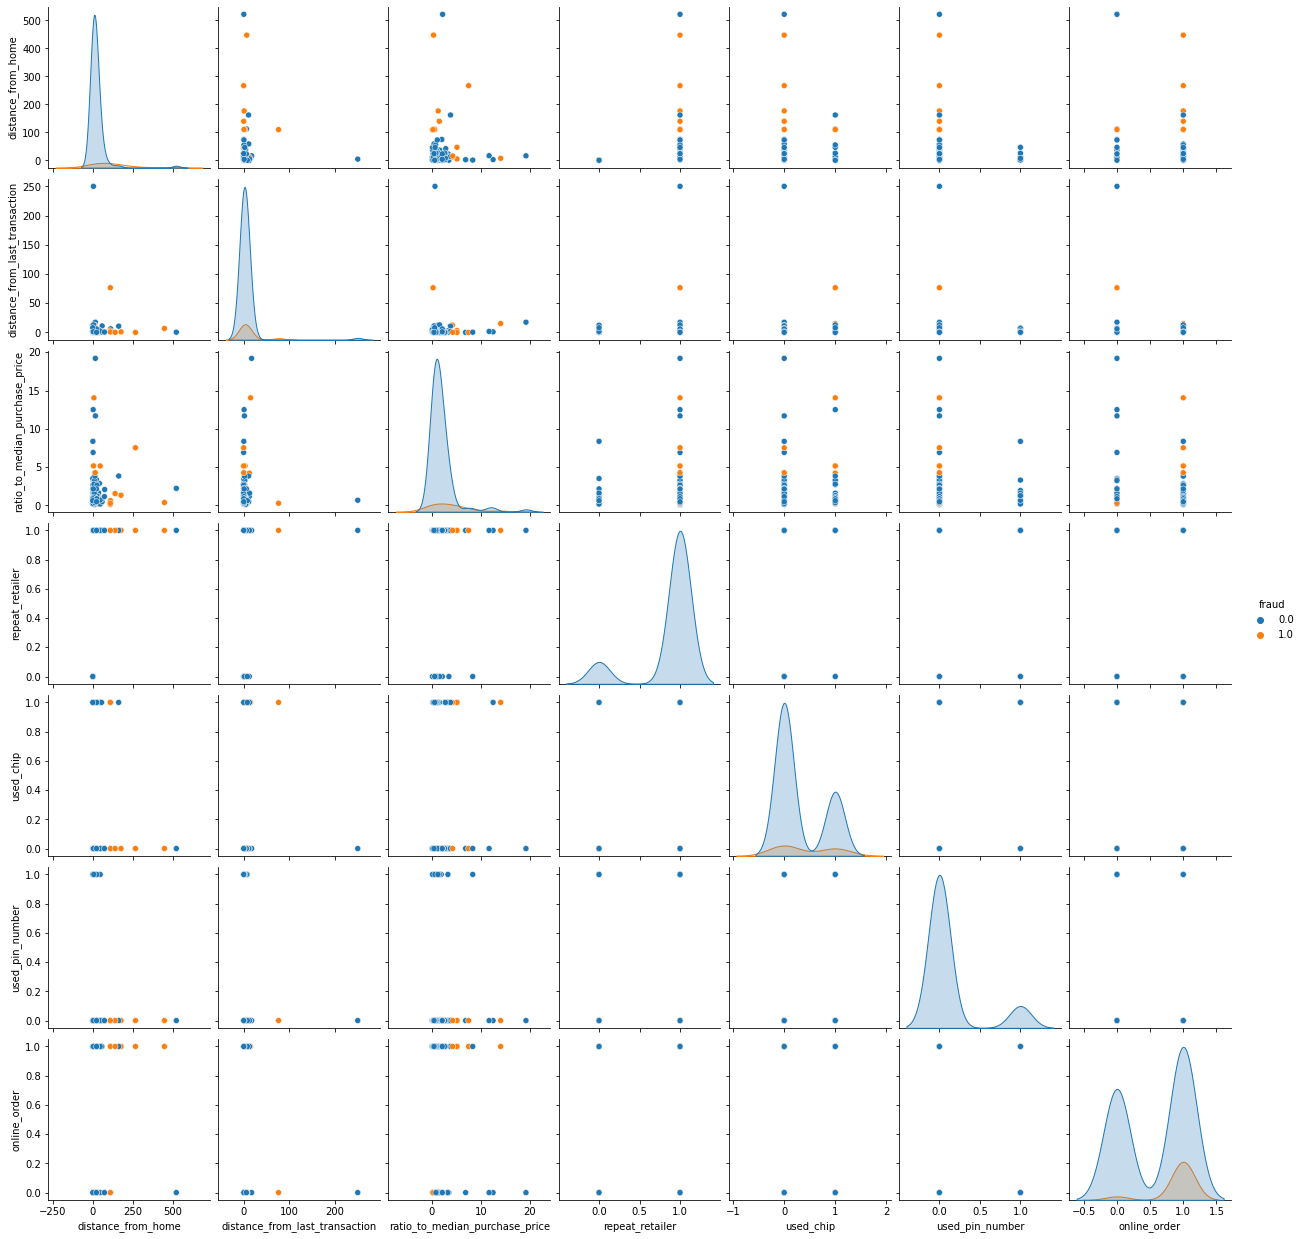

In [8]:
%matplotlib inline

sb.pairplot(dataFrame, hue='fraud')

In [9]:
dataFrame.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [10]:
feature = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']

x = dataFrame[feature]
x

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
507118,4.719898,250.182591,0.681337,1.0,0.0,0.0,0.0
965013,10.390054,1.116391,0.233893,1.0,0.0,0.0,1.0
867401,112.296564,6.246214,0.430082,1.0,1.0,0.0,0.0
850228,1.301900,1.010007,0.747697,0.0,0.0,0.0,1.0
772911,2.067389,0.332495,2.558499,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
758977,25.496865,0.137849,0.873551,1.0,1.0,0.0,1.0
395767,23.362919,6.055700,2.166045,1.0,0.0,0.0,0.0
332808,0.724952,8.052901,0.623552,0.0,1.0,0.0,1.0
917940,4.174921,1.161947,2.151826,1.0,0.0,0.0,1.0


In [11]:
correlation = dataFrame.corr()
correlation

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.004687,-0.010439,0.153680,-0.085868,-0.106303,0.023359,0.413595
distance_from_last_transaction,-0.004687,1.000000,-0.015850,0.038861,-0.001832,-0.050654,-0.152110,0.060580
ratio_to_median_purchase_price,-0.010439,-0.015850,1.000000,0.026899,0.046805,-0.022109,-0.120144,0.195263
repeat_retailer,0.153680,0.038861,0.026899,1.000000,0.097437,-0.182840,-0.011852,0.129823
used_chip,-0.085868,-0.001832,0.046805,0.097437,1.000000,0.109875,-0.054346,0.085167
used_pin_number,-0.106303,-0.050654,-0.022109,-0.182840,0.109875,1.000000,-0.251527,-0.129823
online_order,0.023359,-0.152110,-0.120144,-0.011852,-0.054346,-0.251527,1.000000,0.225699
fraud,0.413595,0.060580,0.195263,0.129823,0.085167,-0.129823,0.225699,1.000000


<AxesSubplot:>

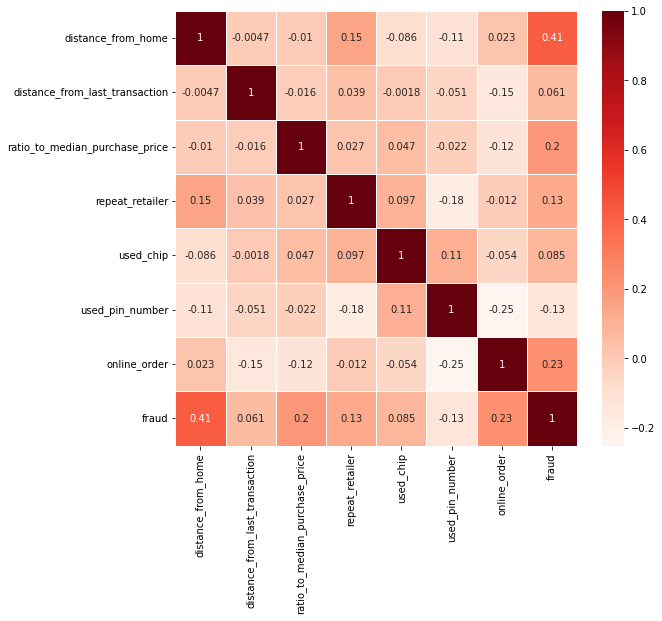

In [12]:
f, ax = plt.subplots(figsize =(9, 8)) 
sb.heatmap(correlation,ax=ax, annot=True, cmap = 'Reds',linewidths=0.5)

Text(0, 0.5, 'number of records')

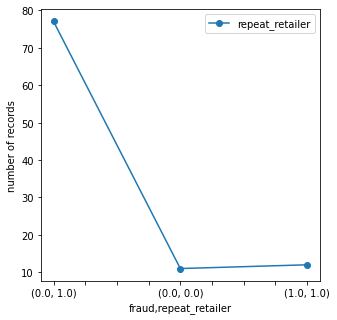

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
dataFrame.groupby('fraud')['repeat_retailer'].value_counts().plot(legend=True,marker='o',ax=ax)
plt.ylabel("number of records")

Text(0, 0.5, 'number of records')

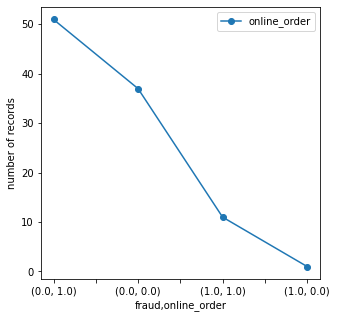

In [17]:
#Fraud - online_order
fig, ax = plt.subplots(figsize=(5,5))
dataFrame.groupby('fraud')['online_order'].value_counts().plot(legend=True,marker='o',ax=ax)
plt.ylabel("number of records")